In [488]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from imutils import paths

In [489]:
img = cv2.imread('/Users/idealguy/Documents/ML projects/Artist Classification/Test_images/edshreen.jpeg')
img.shape

(225, 225, 3)

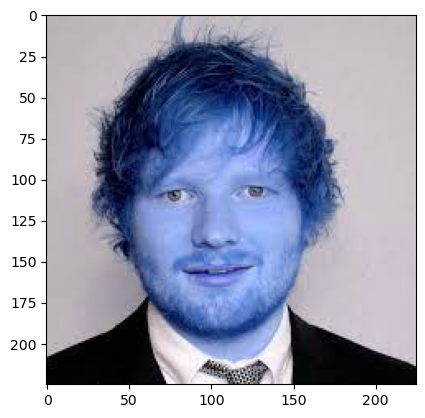

In [490]:
plt.imshow(img)

In [491]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(225, 225)

In [492]:
gray

array([[181, 181, 181, ..., 189, 189, 188],
       [181, 181, 181, ..., 189, 189, 188],
       [181, 181, 181, ..., 189, 189, 188],
       ...,
       [  4,   4,   4, ...,   5,   6,   3],
       [  4,   4,   4, ...,   5,   5,   3],
       [  4,   4,   4, ...,   5,   5,   6]], dtype=uint8)

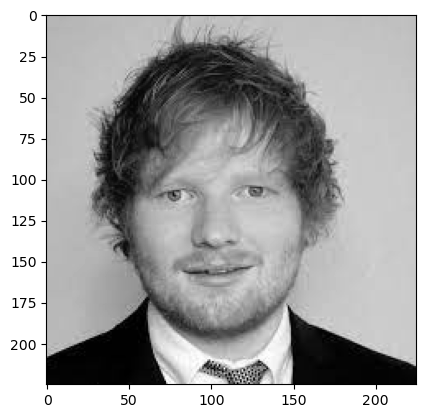

In [493]:
plt.imshow(gray, cmap='gray')

In [494]:
face_cascade = cv2.CascadeClassifier('/Users/idealguy/anaconda3/lib/python3.11/site-packages/cv2/data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/Users/idealguy/anaconda3/lib/python3.11/site-packages/cv2/data/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 40,  61, 126, 126]], dtype=int32)

In [495]:
(x,y,w,h) = faces[0]
x,y,w,h

(40, 61, 126, 126)

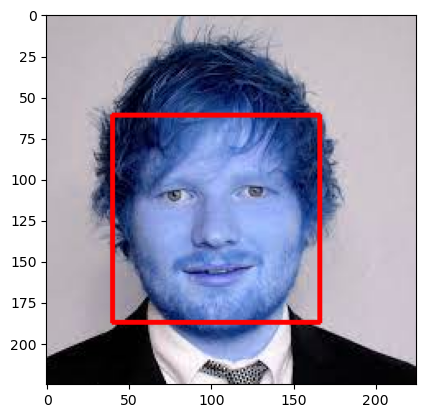

In [496]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

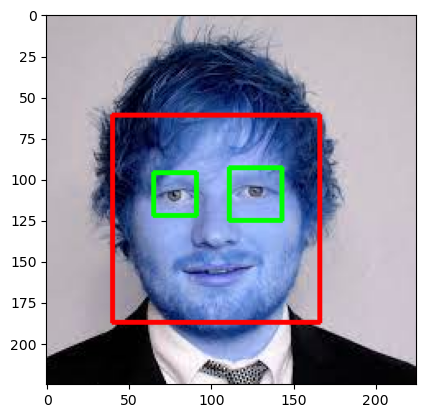

In [497]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

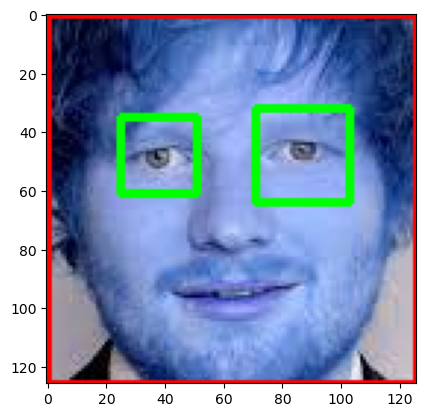

In [498]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [499]:
cropped_img = np.array(roi_color)
cropped_img.shape

(126, 126, 3)

In [500]:
 def get_cropped_image_if_2_eyes(image_path):
#     img = cv2.imread(image_path)
# #     if img is not None and img.any():
# #         gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# #     else:
# #         print(image_path)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.imread(image_path)
    try:
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    except cv2.error as e:
      return
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color  

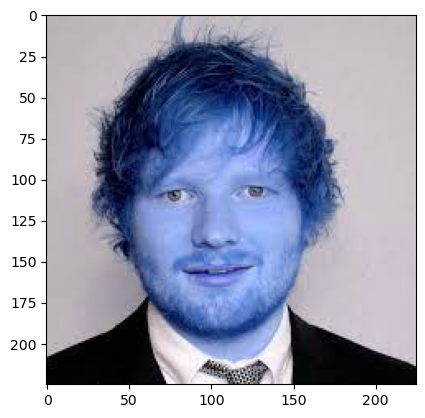

In [501]:
original_image = cv2.imread('/Users/idealguy/Documents/ML projects/Artist Classification/Test_images/edshreen.jpeg')
plt.imshow(original_image)

In [502]:
cropped_image = get_cropped_image_if_2_eyes('/Users/idealguy/Documents/ML projects/Artist Classification/Test_images/edshreen.jpeg')
# plt.imshow(cropped_image)

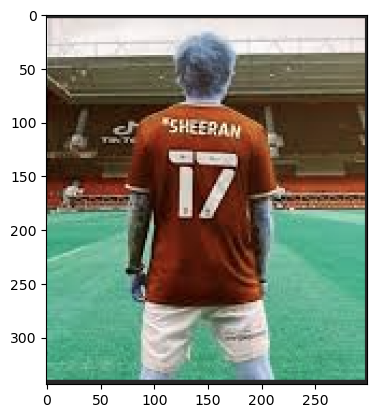

In [503]:
org_image_obstructed = cv2.imread('/Users/idealguy/Documents/ML projects/Artist Classification/Test_images/Screenshot 2023-12-28 at 2.31.46 AM.png')
plt.imshow(org_image_obstructed)

In [504]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('/Users/idealguy/Documents/ML projects/Artist Classification/Test_images/Screenshot 2023-12-28 at 2.31.46 AM.png')
cropped_image_no_2_eyes

In [505]:
path_to_data = "/Users/idealguy/Documents/ML projects/Artist Classification/dataset/"
path_to_cr_data = "/Users/idealguy/Documents/ML projects/Artist Classification/cropped/"

In [506]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [507]:
img_dirs

['/Users/idealguy/Documents/ML projects/Artist Classification/dataset/justin_bieber',
 '/Users/idealguy/Documents/ML projects/Artist Classification/dataset/EMINEM',
 '/Users/idealguy/Documents/ML projects/Artist Classification/dataset/the_weekend',
 '/Users/idealguy/Documents/ML projects/Artist Classification/dataset/bruno_mars',
 '/Users/idealguy/Documents/ML projects/Artist Classification/dataset/Travis_Scott ',
 '/Users/idealguy/Documents/ML projects/Artist Classification/dataset/WIZ_KHALIFA',
 '/Users/idealguy/Documents/ML projects/Artist Classification/dataset/Drake']

In [508]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [509]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  /Users/idealguy/Documents/ML projects/Artist Classification/cropped/justin_bieber
Generating cropped images in folder:  /Users/idealguy/Documents/ML projects/Artist Classification/cropped/EMINEM
Generating cropped images in folder:  /Users/idealguy/Documents/ML projects/Artist Classification/cropped/the_weekend
Generating cropped images in folder:  /Users/idealguy/Documents/ML projects/Artist Classification/cropped/bruno_mars
Generating cropped images in folder:  /Users/idealguy/Documents/ML projects/Artist Classification/cropped/Travis_Scott 
Generating cropped images in folder:  /Users/idealguy/Documents/ML projects/Artist Classification/cropped/WIZ_KHALIFA
Generating cropped images in folder:  /Users/idealguy/Documents/ML projects/Artist Classification/cropped/Drake


In [510]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

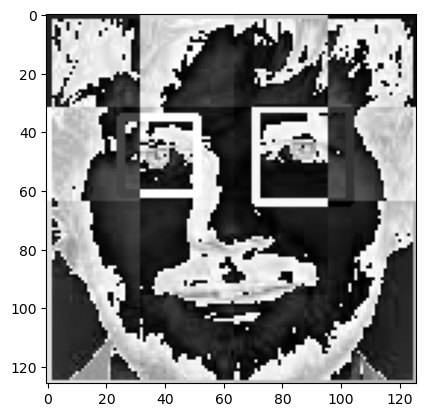

In [511]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [512]:
celebrity_file_names_dict

{'justin_bieber': ['/Users/idealguy/Documents/ML projects/Artist Classification/cropped/justin_bieber/justin_bieber1.png',
  '/Users/idealguy/Documents/ML projects/Artist Classification/cropped/justin_bieber/justin_bieber2.png',
  '/Users/idealguy/Documents/ML projects/Artist Classification/cropped/justin_bieber/justin_bieber3.png',
  '/Users/idealguy/Documents/ML projects/Artist Classification/cropped/justin_bieber/justin_bieber4.png',
  '/Users/idealguy/Documents/ML projects/Artist Classification/cropped/justin_bieber/justin_bieber5.png',
  '/Users/idealguy/Documents/ML projects/Artist Classification/cropped/justin_bieber/justin_bieber6.png',
  '/Users/idealguy/Documents/ML projects/Artist Classification/cropped/justin_bieber/justin_bieber7.png',
  '/Users/idealguy/Documents/ML projects/Artist Classification/cropped/justin_bieber/justin_bieber8.png',
  '/Users/idealguy/Documents/ML projects/Artist Classification/cropped/justin_bieber/justin_bieber9.png',
  '/Users/idealguy/Documents/

In [513]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'justin_bieber': 0,
 'EMINEM': 1,
 'the_weekend': 2,
 'bruno_mars': 3,
 'Travis_Scott ': 4,
 'WIZ_KHALIFA': 5,
 'Drake': 6}

In [521]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

[ WARN:0@12861.505] global loadsave.cpp:248 findDecoder imread_('/Users/idealguy/Documents/ML projects/Artist Classification/cropped/justin_bieber/justin_bieber8.png'): can't open/read file: check file path/integrity
[ WARN:0@12861.539] global loadsave.cpp:248 findDecoder imread_('/Users/idealguy/Documents/ML projects/Artist Classification/cropped/justin_bieber/justin_bieber18.png'): can't open/read file: check file path/integrity
[ WARN:0@12861.755] global loadsave.cpp:248 findDecoder imread_('/Users/idealguy/Documents/ML projects/Artist Classification/cropped/justin_bieber/justin_bieber46.png'): can't open/read file: check file path/integrity
[ WARN:0@12861.767] global loadsave.cpp:248 findDecoder imread_('/Users/idealguy/Documents/ML projects/Artist Classification/cropped/EMINEM/EMINEM4.png'): can't open/read file: check file path/integrity
[ WARN:0@12861.820] global loadsave.cpp:248 findDecoder imread_('/Users/idealguy/Documents/ML projects/Artist Classification/cropped/EMINEM/EMIN

In [522]:
len(X)

160

In [523]:
X[0]

array([[242],
       [246],
       [247],
       ...,
       [223],
       [ 24],
       [ 54]], dtype=uint8)

In [524]:
y[0]

0

In [525]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(160, 4096)

SVM model

In [526]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [546]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'linear', C = 1))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6

In [547]:
len(X_test)

40

In [548]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60        10
           1       1.00      0.38      0.55         8
           2       1.00      1.00      1.00         2
           3       0.50      1.00      0.67         9
           4       0.00      0.00      0.00         4
           5       0.33      0.25      0.29         4
           6       0.75      1.00      0.86         3

    accuracy                           0.60        40
   macro avg       0.60      0.60      0.56        40
weighted avg       0.60      0.60      0.55        40



/Users/idealguy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/idealguy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/idealguy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [549]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [550]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [551]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/Users/idealguy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/idealguy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/idealguy/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


,model,best_score,best_params
0,svm,0.658333,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.408333,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.658333,{'logisticregression__C': 1}


In [552]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [553]:
best_estimators['svm'].score(X_test,y_test)

0.6

In [554]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.6

In [555]:
best_clf = best_estimators['svm']

In [556]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[6, 0, 0, 2, 0, 1, 1],
       [2, 3, 0, 3, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 9, 0, 0, 0],
       [0, 0, 0, 3, 0, 1, 0],
       [2, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 3]])

Text(95.72222222222221, 0.5, 'Truth')

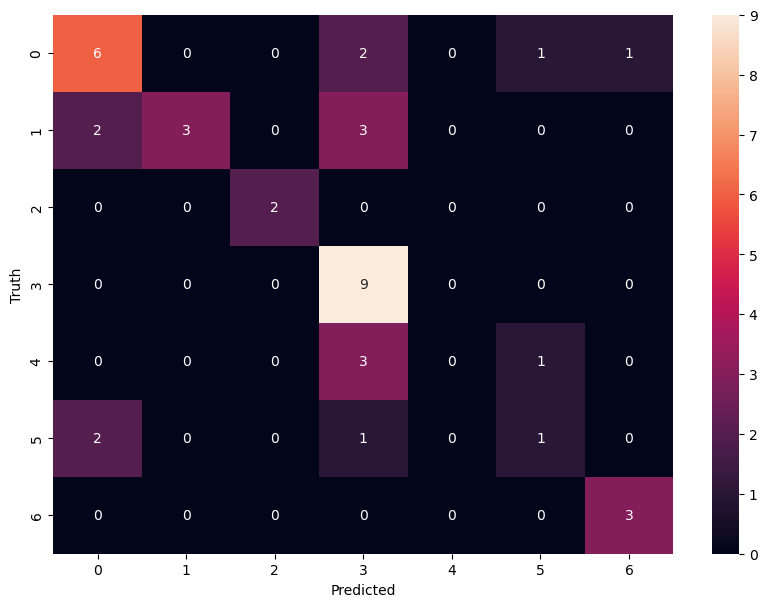

In [557]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [558]:
class_dict

{'justin_bieber': 0,
 'EMINEM': 1,
 'the_weekend': 2,
 'bruno_mars': 3,
 'Travis_Scott ': 4,
 'WIZ_KHALIFA': 5,
 'Drake': 6}

In [560]:
!pip install joblib
import joblib 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [561]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))